<a href="https://colab.research.google.com/github/jacedoe/pythoniso/blob/main/iot_big_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Apuntes del MOOC IoT y Big Data de la Universidad Rosario

In [ ]:
# Importamos todas las librerías a usar
import pandas as pd #(Librería para manejar y visualizar los datos)
from matplotlib import pyplot as plt #(Librería básica para graficar los datos)
import numpy as np #(Librería numérica de python)
import cufflinks as cf #(Librería avanzada para visualizar los datos)
import plotly as py #(Librería  avanzada para visualizar los datos)
import seaborn as sns #(Librería  avanzada para visualizar los datos)
from sklearn import datasets #(Librería para cargar conjuntos de datos clásicos)
%matplotlib inline

In [ ]:

iris_db = pd.read_csv('data/iris.csv')
iris_db.head() 

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
iris_db.keys()


Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

!pip install plotly && pip install cufflinks


In [ ]:
iris = pd.read_csv('data/iris.csv')
iris.keys()

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [ ]:
n_samples, n_features = iris.shape
print('Número de muestras:', n_samples)
print('Número de características:', n_features)


Número de muestras: 150
Número de características: 5


In [ ]:
iris.loc[0]

sepal.length       5.1
sepal.width        3.5
petal.length       1.4
petal.width        0.2
variety         Setosa
Name: 0, dtype: object

In [ ]:
print(iris['variety'].unique())

['Setosa' 'Versicolor' 'Virginica']


In [ ]:
iris = pd.read_csv('data/iris.csv')
#Definimos una función para cambiar de variable categórica (tipo de flor) a un número
def flor_a_numero(x):
    if x=='Setosa':
        return 0
    if x=='Versicolor':
        return 1
    if x=='Virginica':
        return 2
      
#Aqui aplicamos la función anterior y la última columna ya no tiene nombre de flores, tiene números
iris['variety'] = iris['variety'].apply(flor_a_numero)
iris.head()



,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:

#Aqui sacamos nuestra matriz con las 4 características y le ponemos nombre + unidad a cada característica
datos_carac = iris[['sepal.length','sepal.width','petal.length','petal.width']].values
tipo_flor = iris['variety'].values
caracteristicas = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']

tipo_flor

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#Definimos un nuevo dataframe con los datos anteriores para graficar
iris_df = pd.DataFrame(datos_carac, columns=caracteristicas)

print('Descripción de todo el dataframe')
iris_df.describe().round(2)

Dscripción de todo el dataframe


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.00,150.00,150.00,150.00
mean,5.84,3.06,3.76,1.20
std,0.83,0.44,1.77,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


### Graficando los datos usando histogramas

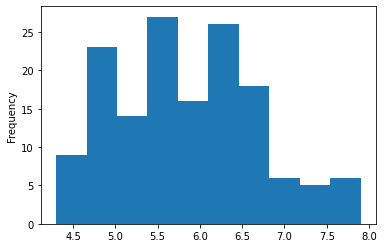

In [ ]:
iris_df['sepal length (cm)'].plot.hist(bins=10)


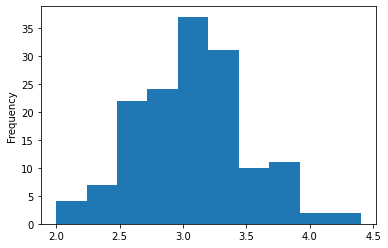

In [ ]:
iris_df['sepal width (cm)'].plot.hist(bins=10)

### Graficando los datos usando líneas

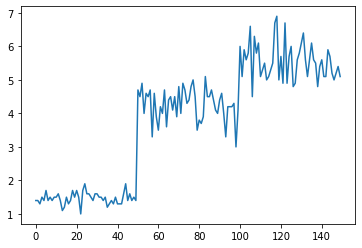

In [ ]:
iris_df['petal length (cm)'].plot(kind='line')
#Podemos ver los 3 grupos de valores para los tres conjuntos de flores

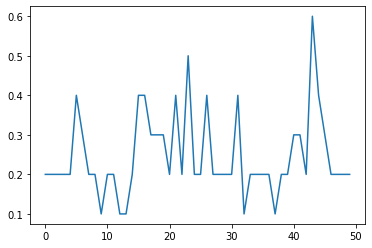

In [ ]:
#Graficando las primeras 50 flores de la misma clase
iris_df['petal width (cm)'][0:50].plot(kind='line')

### Graficando diagrama de barras

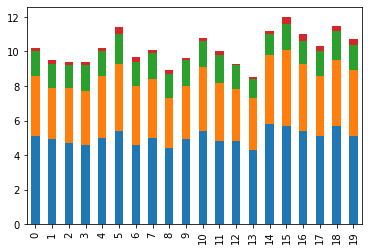

In [ ]:
#Haciendo un diagrama de barra de las 4 caracter´siticas de los 20 primeros valores 
iris_df[0:20].plot(kind='bar', stacked=True, legend=False)

### Graficando diagrama de densidad

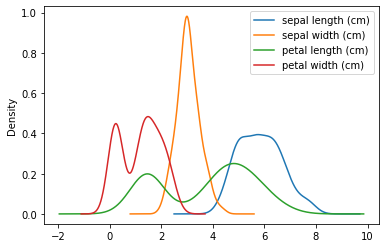

In [ ]:
iris_df.plot(kind='density')

### Graficando con puntos dos características

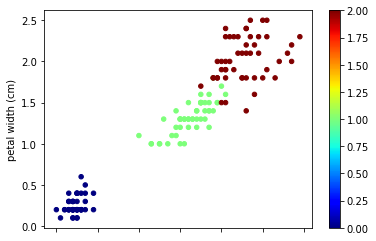

In [ ]:
iris_df.plot(kind='scatter', x='petal length (cm)',y='petal width (cm)',c=tipo_flor,cmap='jet')

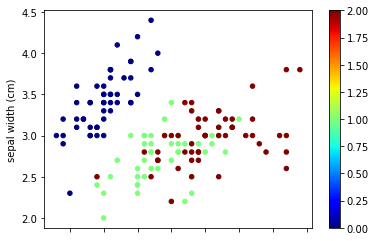

In [ ]:
iris_df.plot(kind='scatter', x='sepal length (cm)',y='sepal width (cm)',c=tipo_flor,cmap='jet')

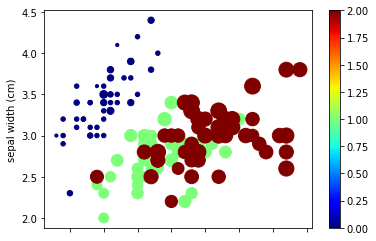

In [ ]:
# Se usa una característica para dar el tamaño del punto
iris_df.plot(kind='scatter', x='sepal length (cm)',y='sepal width (cm)',c=tipo_flor,cmap='jet',s=iris_df['petal width (cm)']*100)

### Pandas

La función scatter_matrix de Pandas nos permite visualizar cada elemento del conjunto de datos como una comparación entre características:

- Largo del sépalo (cm)
- Ancho del sépalo (cm)
- Largo del pétalo (cm)
- Ancho del pétalo (cm)

A continuación comparamos cada pareja de características usando scatter_matrix:

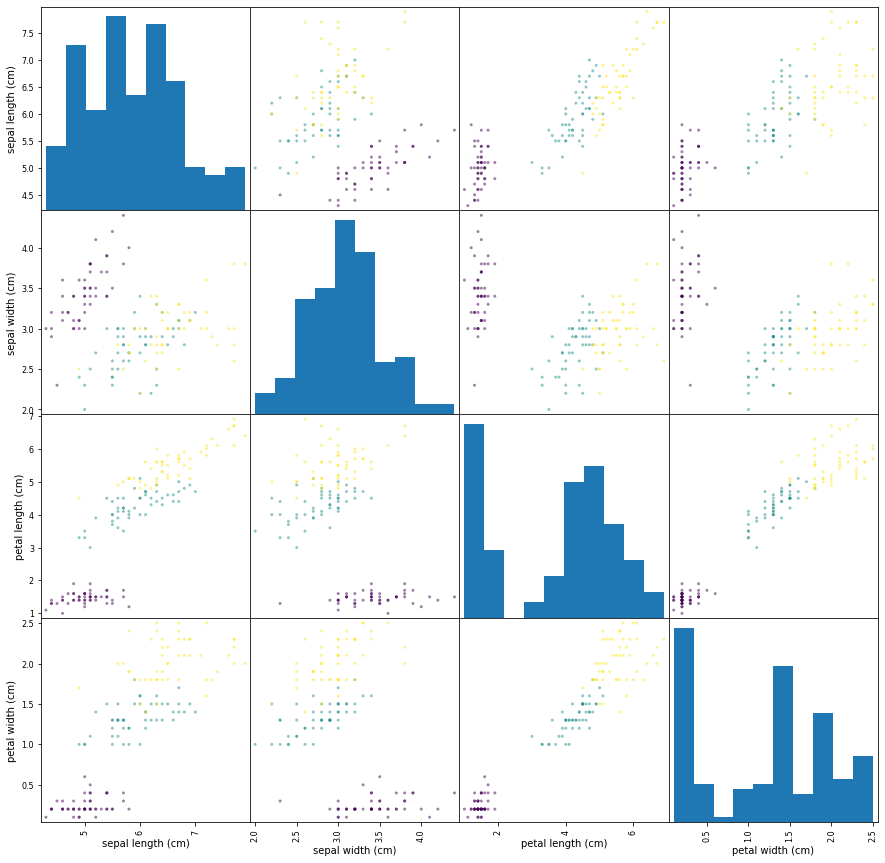

In [ ]:

pd.plotting.scatter_matrix(iris_df, c=tipo_flor, cmap='viridis', figsize=(15, 15));